Будем анализировать результаты ЕГЭ обучающихся московских школ. 

Данные взяты отсюда data.mos.ru/opendata 

По сути данный набор данных интересен только для Департамента образования города Москвы (и для школ Москвы)
Данная статистика используется для построение так называемого рейтинга школ Москвы (или вклада образовательного учреждения)
Содержит информацию: название образовательной организации, учеьный год, административный округ, район, 
количество выпускников 11-х классов набравших по трем предметам 220 и более баллов (over_220) (основное поле для анализа)
количество выпускников 11-х классов набравших по трем предметам менее 160 баллов (under_160)

In [193]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [194]:
columns = ["id","edu_name","global_id","year","adm_area","district","over_220","under_160"]
ege = pd.read_csv('data/ege2017.csv',sep=';', names=columns, header=0, 
                 dtype = {"id": np.int64, "edu_name": np.object, "global_id": np.object, 
                          "year": np.object,"adm_area":np.object, "district": np.object,
                          "over_220": np.uint32, "under_160": np.uint32})
print(len(ege)) # количество школ
ege

758


,id,edu_name,global_id,year,adm_area,district,over_220,under_160
0,8236,Государственное бюджетное общеобразовательное ...,797946035,2016-2017,Восточный административный округ,район Богородское,5,19
1,8237,Государственное казенное общеобразовательное у...,797949150,2016-2017,Восточный административный округ,район Богородское,14,47
2,8238,Государственное казенное общеобразовательное у...,797949275,2016-2017,Восточный административный округ,район Вешняки,0,1
3,8239,Частное учреждение общеобразовательная организ...,797949425,2016-2017,Восточный административный округ,район Вешняки,0,6
4,8240,Автономная некоммерческая организация средняя ...,797949570,2016-2017,Восточный административный округ,район Восточное Измайлово,1,5
5,8241,Государственное бюджетное общеобразовательное ...,797949715,2016-2017,Восточный административный округ,район Восточный,8,27
6,8242,Государственное бюджетное образовательное учре...,797949790,2016-2017,Восточный административный округ,район Ивановское,16,41
7,8243,Государственное бюджетное общеобразовательное ...,797949791,2016-2017,Восточный административный округ,район Измайлово,2,7
8,8244,Общеобразовательная автономная некоммерческая ...,797949792,2016-2017,Восточный административный округ,район Измайлово,0,0
9,8245,Государственное бюджетное общеобразовательное ...,797949793,2016-2017,Восточный административный округ,район Косино-Ухтомский,7,30


Выведем ТОП-5 школ

In [195]:
school_sorted = ege.sort_values(by="over_220", ascending=False)
school_sorted.head()

,id,edu_name,global_id,year,adm_area,district,over_220,under_160
218,8454,Федеральное государственное автономное образов...,797973694,2016-2017,Центральный административный округ,Басманный район,560,653
426,8663,Государственное бюджетное общеобразовательное ...,797990904,2016-2017,Южный административный округ,Нагорный район,308,385
372,8608,Государственное бюджетное общеобразовательное ...,797986834,2016-2017,Центральный административный округ,район Хамовники,276,296
396,8633,Федеральное государственное автономное образов...,797988496,2016-2017,Южный административный округ,район Москворечье-Сабурово,221,305
130,8366,Государственное бюджетное общеобразовательное ...,797964469,2016-2017,Восточный административный округ,район Ивановское,198,262


Сгруппируем данные по районам и выведем ТОП-5 районов

In [196]:
district = ege.groupby('district').aggregate({'over_220': 'sum', 'under_160': 'sum'}).sort_values(by="over_220", ascending=False)
district.head()

,over_220,under_160
district,,
Басманный район,790,1159
район Хамовники,773,976
Гагаринский район,441,685
Нагорный район,394,595
Пресненский район,382,649


Сгруппируем данные по административным округам

In [197]:
adm_area = ege.groupby('adm_area').aggregate({'over_220': 'sum', 'under_160': 'sum'}).sort_values(by="over_220", ascending=False)
adm_area

,over_220,under_160
adm_area,,
Центральный административный округ,3385,5548
Юго-Западный административный округ,2222,4678
Западный административный округ,1945,4084
Южный административный округ,1894,4180
Восточный административный округ,1643,3836
Северо-Восточный административный округ,1519,3376
Юго-Восточный административный округ,1499,3520
Северный административный округ,1413,3274
Северо-Западный административный округ,1224,2681


Построим диаграмму по административным округам

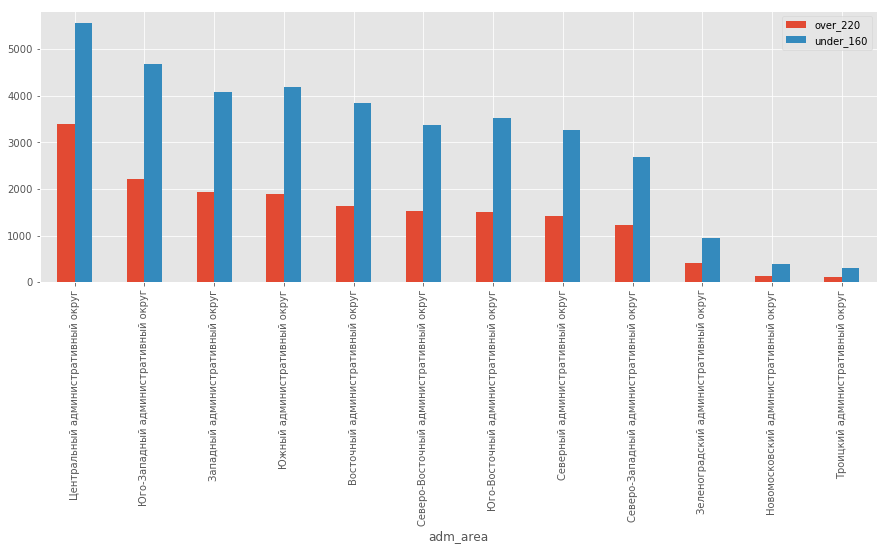

In [198]:
adm_area.plot(kind="bar")

Построим диаграммы по данным 20 лучших и худших районов

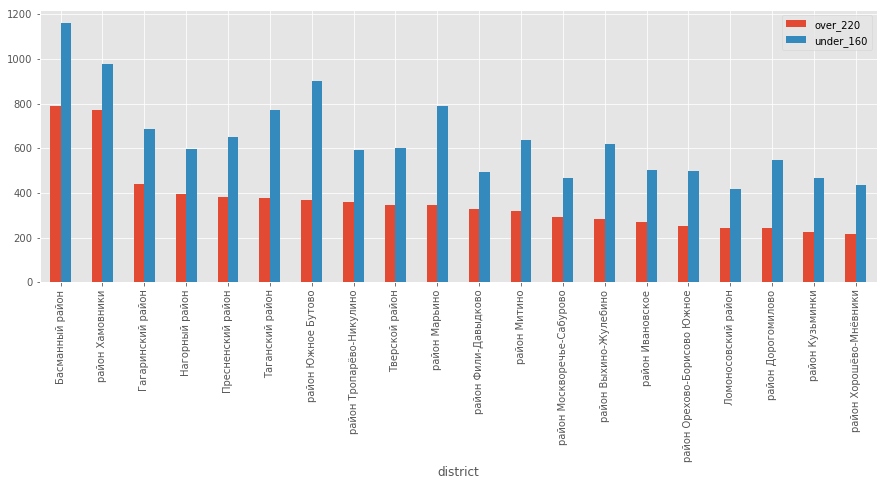

In [200]:
district[:20].plot(kind="bar")

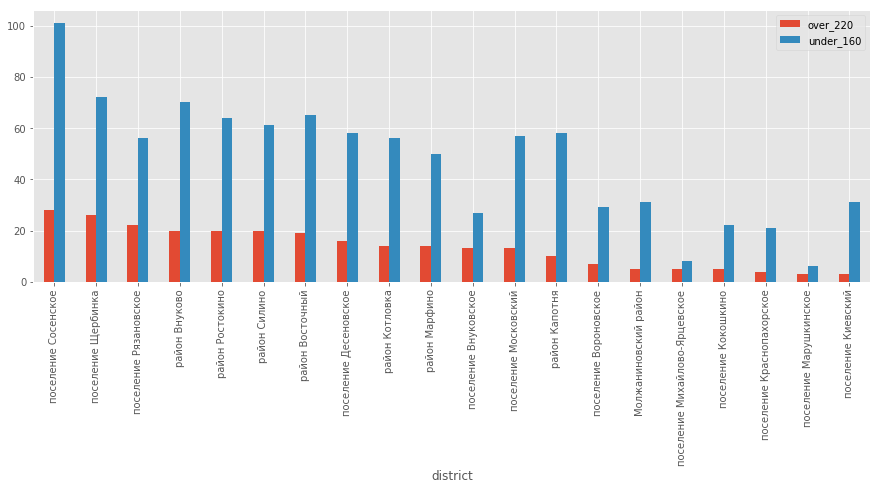

In [201]:
district[-20:].plot(kind="bar")

Некоторые статистические показатели (среднее значение, медиана, количество школ с показателями больше, меньше и равными медиане)

In [203]:
print(ege.over_220.mean())

22.9617414248


In [204]:
median = ege.over_220.median()
print(median)
print(len(ege[ege.over_220 > median]))
print(len(ege[ege.over_220 < median]))
print(len(ege[ege.over_220 == median]))

13.0
376
354
28


ТОП-10 школ

In [205]:
top10 = school_sorted.loc[:, ["edu_name", "over_220"]][:10]
top10

,edu_name,over_220
218,Федеральное государственное автономное образов...,560
426,Государственное бюджетное общеобразовательное ...,308
372,Государственное бюджетное общеобразовательное ...,276
396,Федеральное государственное автономное образов...,221
130,Государственное бюджетное общеобразовательное ...,198
404,Государственное бюджетное общеобразовательное ...,165
241,Федеральное государственное бюджетное образова...,165
742,Государственное автономное общеобразовательное...,138
26,Государственное бюджетное общеобразовательное ...,130
695,Государственное бюджетное общеобразовательное ...,124


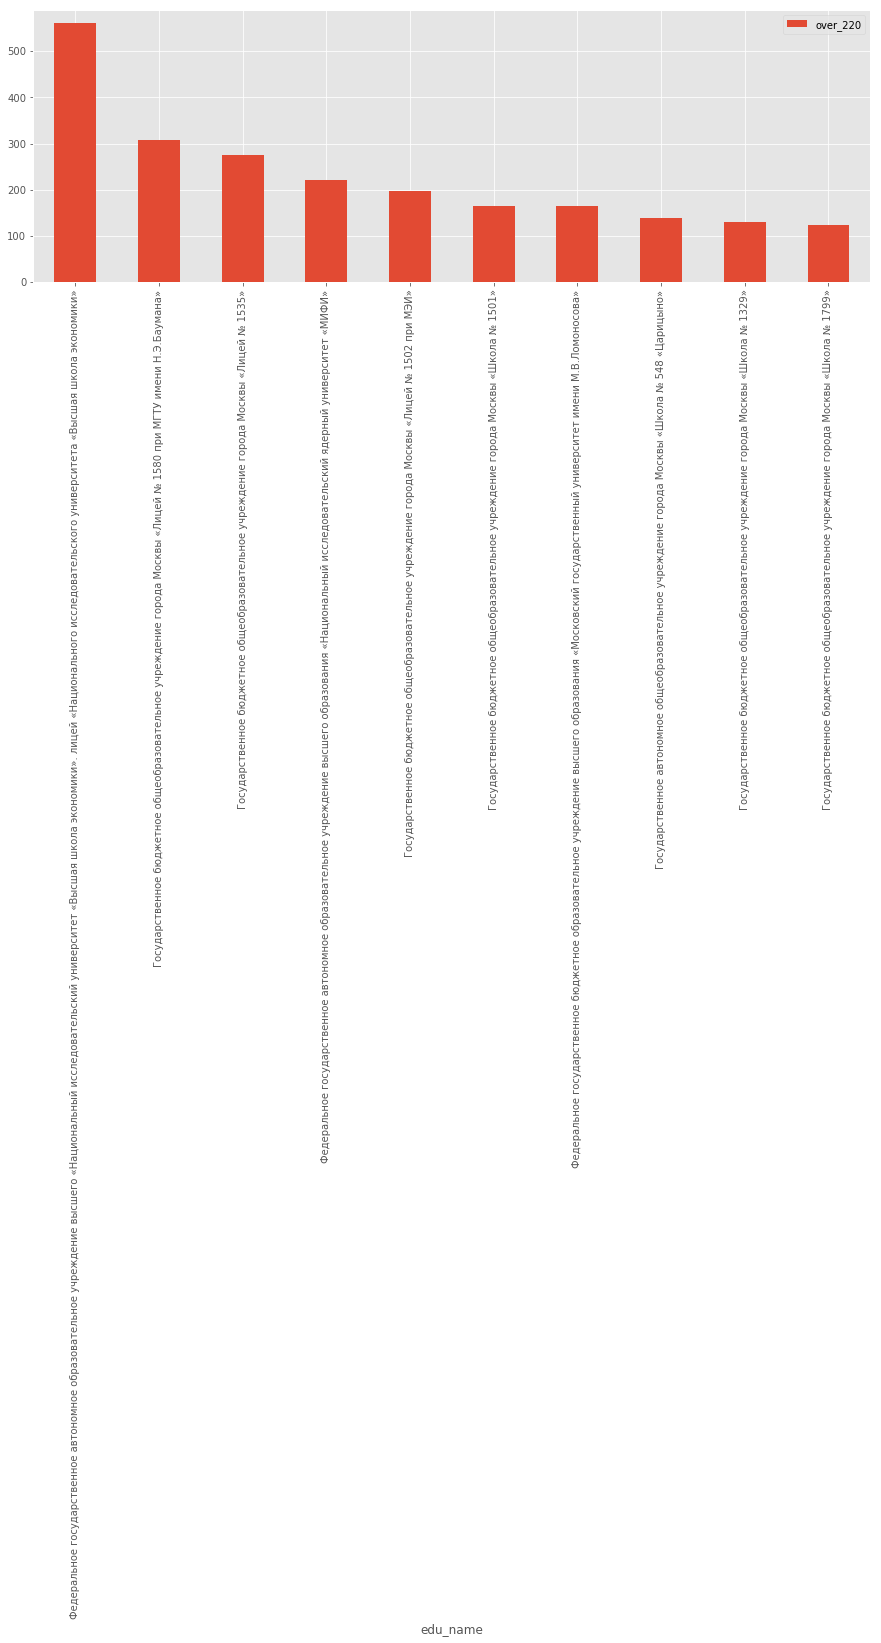

In [206]:
top10.plot(kind="bar", x="edu_name")